<a href="https://colab.research.google.com/github/bajajraj/FinancialDataAnalysis/blob/main/Competition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
# importing modules
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, matthews_corrcoef
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE

In [2]:
# Store x_train in Dataframe
x_train = pd.read_csv('x_train.csv')
print("The shape of the x_train is", x_train.shape)

The shape of the x_train is (200000, 27)


In [3]:
# Store the y_train in Datframe
y_train = pd.read_csv('y_train.csv')
print("The shape of the y_train is", y_train.shape)

The shape of the y_train is (200000, 1)


In [4]:
# Store the x_test in DataFrame
x_test = pd.read_csv('x_test.csv')
print('The shape of the x_test is', x_test.shape)

The shape of the x_test is (10000, 28)


In [5]:
# Doing some data preprocessing. First, converting the data for normalization using Min-Max Scaling between the range of 0
# to 1

# Create MinMaxScaler object
scaler = MinMaxScaler()
# apply Min-Max scaling to all columns
x_normalized_data = pd.DataFrame(scaler.fit_transform(x_train), columns=x_train.columns)
x_normalized_data

,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,...,v18,v19,v20,v21,v22,v23,v24,v25,v26,v27
0,0.013166,0.768603,0.266142,0.535434,0.522835,0.541423,0.783392,0.501795,0.502335,0.268482,...,0.544884,0.395308,0.561678,0.491362,0.704808,0.411224,0.543566,0.395226,0.648976,0.257249
1,0.000228,0.801162,0.242514,0.555572,0.538073,0.549635,0.787447,0.457165,0.497903,0.234985,...,0.558398,0.390898,0.556413,0.470343,0.700732,0.265424,0.570273,0.475939,0.657261,0.258859
2,0.031874,0.817670,0.400953,0.527333,0.587932,0.534521,0.793047,0.490613,0.509299,0.335463,...,0.471219,0.406263,0.570319,0.541971,0.692552,0.386553,0.581683,0.485832,0.650151,0.259935
3,0.006867,0.818750,0.186868,0.541694,0.535038,0.542487,0.784022,0.441919,0.521529,0.395007,...,0.536447,0.381165,0.566132,0.586573,0.715858,0.419549,0.571692,0.405871,0.651065,0.248055
4,0.002747,0.817387,0.261164,0.552048,0.543797,0.550565,0.785926,0.441782,0.501923,0.251173,...,0.650606,0.391680,0.556455,0.465054,0.700437,0.299797,0.572812,0.508024,0.648075,0.258368
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,0.001567,0.786132,0.295686,0.568267,0.629324,0.531030,0.803605,0.446723,0.515637,0.236953,...,0.539218,0.385381,0.561330,0.500019,0.703333,0.557150,0.578470,0.423333,0.625833,0.249951
199996,0.007326,0.798893,0.301278,0.542977,0.549272,0.538444,0.786754,0.474722,0.505937,0.253219,...,0.501090,0.393688,0.564249,0.524623,0.698836,0.305282,0.598338,0.396082,0.651660,0.258256
199997,0.001272,0.793069,0.157386,0.553693,0.522448,0.551939,0.782272,0.405393,0.507627,0.253134,...,0.592491,0.393279,0.569585,0.573206,0.695802,0.522766,0.601414,0.453475,0.651952,0.259701
199998,0.000544,0.763356,0.170194,0.532351,0.521483,0.534035,0.797997,0.472407,0.488551,0.327849,...,0.732113,0.383653,0.564374,0.503341,0.702928,0.365480,0.550635,0.409866,0.607199,0.249779


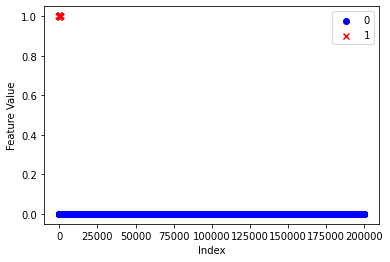

In [6]:
# Creating some plot to see the data seperation
# separate 0 and 1 values into two Series
zeros = y_train.loc[y_train['isfraud'] == 0, 'isfraud']
ones = y_train.loc[y_train['isfraud'] == 1, 'isfraud']

# create scatter plots for 0 and 1 values
plt.scatter(range(len(zeros)), zeros, color='blue', marker='o', label='0')
plt.scatter(range(len(ones)), ones, color='red', marker='x', label='1')

# add axis labels and legend
plt.xlabel('Index')
plt.ylabel('Feature Value')
plt.legend()

# show plot
plt.show()

In [7]:
# Now it can be seen that there are much more of 0s than 1s in our data, so it best to reduce the number of 0s to not
# have a bias machine learning training data.

# Let us first look at the number of 0s and 1s
print('The number of 0s are', len(zeros))
print('The number of 1s are', len(ones))

The number of 0s are 199647
The number of 1s are 353


In [8]:
# It is best to make the data balance. I will be using the Synthetic minority over-sampling technique. It will allow
# to handle class imbalance. It involves generating synthetic samples for minority class using interpolation. 

# perform SMOTE over-sampling
smote = SMOTE()
x_resampled, y_resampled = smote.fit_resample(x_normalized_data, y_train)

# print the number of samples in each class
print('The shape of features is', x_resampled.shape)
print('The shape of label is', y_resampled.shape)

The shape of features is (399294, 27)
The shape of label is (399294, 1)


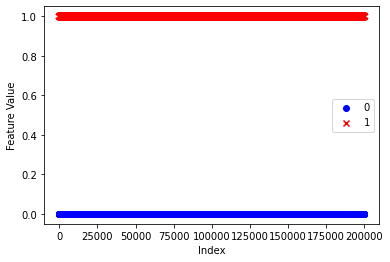

The number of 0s in the new balanced data is 199647
The number of 1s in the new balanced data is 199647


In [9]:
# Let us now look at the samples and see the visualization
# Creating some plot to see the data seperation
# separate 0 and 1 values into two Series
zeros = y_resampled.loc[y_resampled['isfraud'] == 0, 'isfraud']
ones = y_resampled.loc[y_resampled['isfraud'] == 1, 'isfraud']

# create scatter plots for 0 and 1 values
plt.scatter(range(len(zeros)), zeros, color='blue', marker='o', label='0')
plt.scatter(range(len(ones)), ones, color='red', marker='x', label='1')

# add axis labels and legend
plt.xlabel('Index')
plt.ylabel('Feature Value')
plt.legend()

# show plot
plt.show()
print('The number of 0s in the new balanced data is', len(zeros))
print('The number of 1s in the new balanced data is', len(ones))

In [10]:
xtrain = x_resampled.to_numpy()
ytrain = y_resampled.to_numpy()
ytrain.shape

(399294, 1)

In [11]:
logistic_regression_pipeline = Pipeline([("logreg", LogisticRegression(solver = 'liblinear', 
                                                                       random_state = 42, max_iter=400, 
                                                                        class_weight='balanced'))])

In [12]:
logistic_regression_pipeline.fit(xtrain, np.ravel(ytrain))

Pipeline(steps=[('logreg',
                 LogisticRegression(class_weight='balanced', max_iter=400,
                                    random_state=42, solver='liblinear'))])

In [13]:
def rand_split_train_test(features, label, train_perc=.8, random_state=42):
    """
    Shuffle the features and labels so they are in a random order.
        sklearn.utils.shuffle does this well.
    Then split the features and labels into training and testing sets
        where train_perc of the samples are in training and the
        remaining are for testing.
    """
    #features_shuffles, label_shuffle = shuffle(features, label, random_state=42)
    test_size = 1 - train_perc
    features_tr, features_te, label_tr, label_te = train_test_split(features, label, 
                                                                     train_size=train_perc,
                                                                     shuffle=True,
                                                                     random_state=random_state,
                                                                     stratify=label)
    
    return features_tr, features_te, label_tr, label_te

In [14]:
features_tr, features_te, label_tr, label_te = rand_split_train_test(xtrain, ytrain)

In [15]:
predicted_train_logistic_regression = logistic_regression_pipeline.predict(features_te)

In [16]:
test_acc_log = accuracy_score(label_te, predicted_train_logistic_regression)

In [17]:
test_acc_log

0.939430746691043

In [18]:
print(classification_report(label_te, predicted_train_logistic_regression))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94     39930
           1       0.97      0.90      0.94     39929

    accuracy                           0.94     79859
   macro avg       0.94      0.94      0.94     79859
weighted avg       0.94      0.94      0.94     79859



In [21]:
print(matthews_corrcoef(label_te, predicted_train_logistic_regression))

0.8810348804008525
